In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Create a DataFrame with the Iris data
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = target


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0 

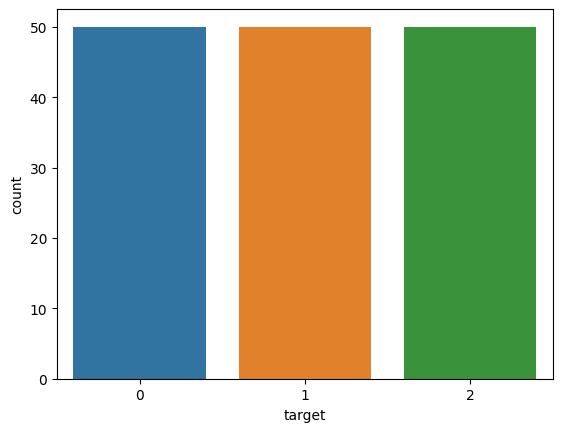

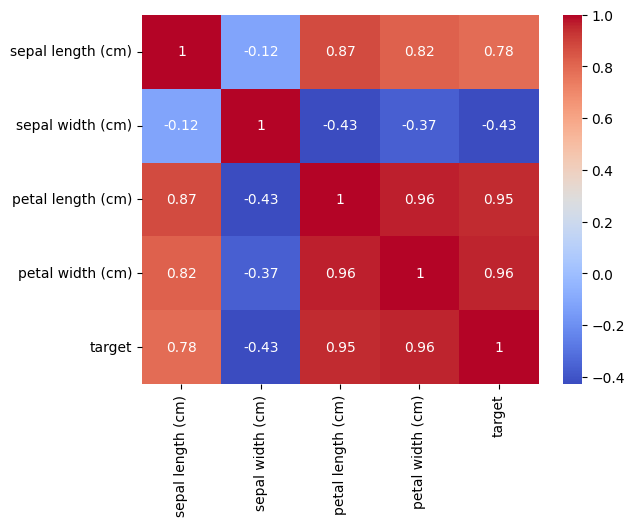

In [ ]:
# Display the first few rows of the dataset
print(df.head(10))

# Check the distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Check the correlation between the features
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_train

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282],
       [ 0.59831066, -1.25582892,  0.72969227,  0.95664273],
       [ 0.72020757,  0.30929911,  0.44316389,  0.4227026 ],
       [-0.74255534,  0.98006827, -1.27600637, -1.31260282],
       [-0.98634915,  1.20365799, -1.33331205, -1.31260282],
       [-0.74255534,  2.32160658, -1.27600637, -1.44608785],
       [-0.01117388, -0.80864948,  0.78699794,  0.95664273],
       [ 0.23261993,  0.75647855,  0.44316389,  0.55618763],
       [ 1.08589829,  0.08570939,  0.55777524,  0.4227026 ],
       [-0.49876152,  1.87442714, -1.39061772, -1.04563275],
       [-0.49876152,  1.4272477 , -1.27600637, -1.31260282],
       [-0.37686461, -1.47941864, -0.01528151, -0.24472256],
       [ 0.59831066, -0.

In [ ]:
# Build and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)


In [ ]:
# Build and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)


In [ ]:
# Build and train the Decision Tree model with Gini impurity criterion
dtree_gini = DecisionTreeClassifier(criterion='gini')
dtree_gini.fit(X_train, y_train)

# Make predictions on the test set using the Gini-based Decision Tree
y_pred_dtree_gini = dtree_gini.predict(X_test)


In [ ]:
# Build and train the Decision Tree model with Information Gain criterion
dtree_info_gain = DecisionTreeClassifier(criterion='entropy')
dtree_info_gain.fit(X_train, y_train)

# Make predictions on the test set using the Information Gain-based Decision Tree
y_pred_dtree_info_gain = dtree_info_gain.predict(X_test)


In [ ]:
# Define a function to calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    confusion = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, confusion

# Calculate evaluation metrics for Logistic Regression
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, confusion_logreg = calculate_metrics(y_test, y_pred_logreg)

# Calculate evaluation metrics for KNN
accuracy_knn, precision_knn, recall_knn, f1_knn, confusion_knn = calculate_metrics(y_test, y_pred_knn)

# Print the evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print("F1 Score:", f1_logreg)
print("Confusion Matrix:")
print(confusion_logreg)
print()

print("KNN Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("Confusion Matrix:")
print(confusion_knn)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


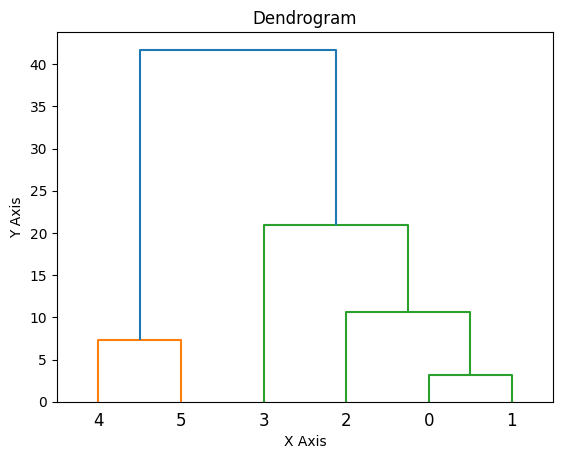

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Data
x_values = [80, 82.5, 90, 100.8, 67, 60]
y_values = [0, 2, 4, 6, 8, 10]

# Combine x and y values into a single array
data = np.array(list(zip(x_values, y_values)))

# Create a linkage matrix
linkage_matrix = linkage(data, method='ward')

# Create the dendrogram
dendrogram(linkage_matrix)

# Add labels and show the plot
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Dendrogram')
plt.show()
